# Won’t you be my (K-Nearest) Neighbor

Alison Casson\
MTH 448: Project 1

## <h1><center>What is KNN?</center></h1>
The K Nearest Neighbors (KNN) Algorithm is a powerful, non-parametric, supervised learning method used for both classification and regression. It is a simple way to classify points based on proximity. 
KNN is also known as a “lazy learner” algorithm because it does not learn from training data. Instead, it stores the training datasets and makes decisions only at the time of classification.
In classification, KNN predicts a label for a given target point by identifying its k nearest neighbors and assigning the most common label among them. It is used for discrete values. In regression, KNN predicts a continuous value by averaging the values of its k nearest neighbors. It is used for continuous values. 

The KNN algorithm is widely used in various applications including finance, to help assess the risk of a loan, and healthcare, to predict the risk of health problems. It can also be used to filter spam emails, recognize patterns, and predict missing values in datasets. 


### How does the KNN Algorithm work?
The algorithm begins with `k`, a value that defines the number of nearby points (neighbors) that will be considered to make a classification. 

The next step of the algorithm is to calculate the distances between the target point and all the points in the dataset. The k closest points are identified using the chosen distance metric. 
For classification, the k nearest neighbors are assigned the most common label among themselves. For regression, the average of the k neighbors is assigned. 
This process is repeated for each target point.  


### Computing k
`k` is the number of nearby points being checked to predict a classification. The choice of `k` affects KNN’s performance. The size of `k` is dependent on the characteristics of the dataset.

`k` can be determined by using cross validation where the data is split into k subsets. Some subsets get trained on the model while the remaining subsets get tested, resulting in a value of `k` that has the highest average validation accuracy. 

The elbow method is another way to determine `k`. The accuracy for different values of k is plotted. As `k` increases, the error decreases (accuracy increases) until a certain point where the error rate decreases at a slower pace. That point, where the accuracy stabilizes, is considered the best ‘k’. 


### Distance Metrics
When implementing the KNN algorithm, there are many different ways of calculating the distance between the target point and the points from the dataset. Distance metrics used in the KNN algorithm include Euclidean distance, Manhattan distance, Minkowski distance, and Hamming distance. Different distance metrics impact classification accuracy, and in some cases, a weighted KNN approach can improve performance by assigning higher importance to closer neighbors.


##### Euclidean Distance
This distance metric measures a straight line between two points on a plane, the target point the other point being measured. It is the most commonly used distance metric and is limited to real-valued vectors. The equation is shown below:

$$
d(x,y) = \sqrt{\sum_{i=1}^{n} (y_i - x_i)^2}
$$

##### Manhattan Distance
This distance metric measures the distance between real vectors using the sum of their absolute difference. It can be visualized as moving along a graph where the distance is traveled using only horizontal and vertical movements, similar to a cab driver on the streets of Manhattan. The equation is shown below:

$$
d(x,y) = \sum_{i=1}^{n} |x_i - y_i|
$$

##### Minkowski Distance
This distance metric is the generalization of Euclidean and Manhattan distance metrics. It utilizes the parameter `p` for the use of other distance metrics. When looking for the Euclidean distance, p=2. When looking for the Manhattan distance, p=1. The equation is shown below. 

$$
d(x,y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$


##### Hamming Distance
This distance metric is used for categorical data and measures mismatches. It uses Boolean logic or string vectors to identify points that do not match the target point. It is also known as the overlap metric. The equation is shown below: 

$$
D_H = \sum_{i=1}^{k} |x_i - i_y|, \quad \text{where} \quad
D =
\begin{cases}
0, & \text{if } x = y \\
1, & \text{if } x \neq y
\end{cases}
$$

### Cons of using the KNN algorithm
While the KNN algorithm is easy to implement and does not require training it has its drawbacks. It is very slow with large datasets. It already requires computing distances to all points, and as datasets grow, it takes up more memory and data storage.

## The Project
The dataset used in this project is the MNIST Database. It is a well-known dataset used for training machine learning models on handwritten digit classification. It contains 60,000 images of handwritten digits (0-9), each represented as a 28×28 pixel array, with an additional 10,000 test images. 
Each image is flattened into a 784-dimensional vector, making it ideal for applying KNN. However, due to the high-dimensional nature of the data, it presents challenges such as increased computational cost and potential inefficiencies in distance calculations.

The goal of this project is to implement a KNN algorithm to analyze and explore its behavior using the MNIST data. 

### <h1><center>Methodology</center></h1>

To create the the KNN algorithm, there are steps that need to be taken to ensure the intended output.
1. Deciding on a distance metric - this is how the distance to the nearest neighbors will be calculated. 
2. Importing the data - data is loaded in as an array to allow for slicing
3. Slicing the data - seperating data into training and testing data to train the algorithm

Once the data is split into training and testing data, the training data can then be used to create and be implemented in the KNN algorithm.

#### Imported Libraries

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st

#### Distance Metrics

In [268]:
def eucledianDistance(a,b):                                                # defines eucledianDistance as a function taking `a` and `b` as points
    eD = np.sqrt(np.sum((a - b)**2, axis=1))                               # equation for eucledian distance by row
    return eD                                                              # returns the euclidian distance between two points
    
def manhattanDistance(a,b):                                                # defines manhattenDistance as a function taking `a` and `b` as points
    manD = np.sum(np.abs(a-b), axis=1)                                     # equation for manhattan distance
    return manD                                                            # retuns the manhatten distance between two points

def minkowskiDistance(a,b,p):                                              # defines minkowskiDistance as a function taking `a`, `b`, and `p` as parameters where `a` and `b` are points
    minkD = np.power(np.sum(np.abs(a - b)**p, axis= 1), 1/p)               # equation for minkowski distance



#### Training Data

In [156]:
data = np.loadtxt("mnist_train.csv", delimiter = ",",dtype=int)            # loads the csv file and make data into an array

images = data[:,1:]                                                        # selects all rows except for the first column of the imported dataset

training_data = images[:40000]                                             # selects the first 40,0000 rows from `images` and defines it as training data

testing_data = images[40000:]                                              # selects all rows after 40,000 from `images` and defines it as testing data

labels = data[:,0]                                                         # selects all rows in the first column

training_labels = labels[:40000]                                           # denotes the first column of the the first 40,000 rows as training labels

testing_labels = labels[40000:]                                            # denotes all rows after 40,0000 from `labels` as testing data

#### KNN Algorithm

In [157]:
def KNN(training_data, training_labels, point, k):                         # define KNN as a function taking "training_data", "training_labels", (target) "point", and "k" as parameters
    
    distance = eucledianDistance(training_data, point)                     # finds the distance between each point in the training data and the target point
    distanceK = np.argsort(distance)[:k]                                   # sorts all distances in ascending order to k (the number of nearest neighbors)
    label = training_labels[distanceK]                                     # retrieves the labels of the k nearest neighbors by indexing training_labels with distanceK.
    predicted_label = st.mode(label)                                       # Finds the most frequently occuring label
    

    return predicted_label, distanceK                                      # returns the predicted label and a list of nearest neighbors

#### Testing

To make sure the algorithm works, it is run with different target `point` and `k`. 

##### `testing_data`= 784 and `k`=5

In [158]:
predicted_label, neighbors = KNN(training_data, training_labels, testing_data[784], 5)      # the function `KNN` is called with 784 points in testing_data and 5 nearest neighbors that will retun a predicted label and a list of nearest neighbors
print("Predicted Label:", predicted_label)                                                  # prints the prediceted label                                            
print("Nearest Neighbors:", neighbors)                                                      # prints the list of nearest neighbors
testing_labels[784]                                                                         # prints the actual label

Predicted Label: 7
Nearest Neighbors: [14710 35978 37556  7906 13566]


7

##### `testing_data`=19999 and `k`=10

In [162]:
predicted_label, neighbors = KNN(training_data, training_labels, testing_data[19999], 10)    # the function `KNN` is called with 19999 points in testing_data and 10 nearest neighbors that will retun a predicted label and a list of nearest neighbors
print("Predicted Label:", predicted_label)                                                   # prints the prediceted label                                            
print("Nearest Neighbors:", neighbors)                                                       # prints the list of nearest neighbors
testing_labels[19999]                                                                        # prints the actual label

Predicted Label: 8
Nearest Neighbors: [24241  1013 31399 30521 20269 12235 20157 17393 29965 14611]


8

##### `testing_data`=50000 and `k`=28

In [164]:
predicted_label, neighbors = KNN(training_data, training_labels, testing_data[5000], 28)     # the function `KNN` is called with 5000 points in testing_data and 28 nearest neighbors that will retun a predicted label and a list of nearest neighbors
print("Predicted Label:", predicted_label)                                                   # prints the prediceted label                                            
print("Nearest Neighbors:", neighbors)                                                       # prints the list of nearest neighbors
testing_labels[5000]                                                                         # prints the actual label

Predicted Label: 3
Nearest Neighbors: [ 1068 25174 39452  7336 16078 20166  2088 10328 18285  2021 30002 12838
 26324 33407  8230 14166 35562  5270 18287 18785 38804 21966 25296 19014
 22322 38495 15760  1836]


3

## <h1><center>Algorithm Exploration</center></h1>

Now that we know the algorithm works, we can explore how changing different factors like changing the size of the data set, changing the k-value, and changing the distance metrics affect the accuracy and results of the model. 

### Accuracy Check

#### Confusion Matrix

Confusion Matricies are used in machine learning to test a models performance by comparing predicted outcomes to actual results. Diagonal elements show correctly predicted samples. 

After failing to create my own confusion matrix, I turned to sklearn.metrics. The code below takes two lists: 
1. `alabel` - a list of the correct labels from the testing data
2. `plabel` - a list of the predicted labels based on the testing data and the value of k

This data is then put into a confusion matrix imported from sklearn.metrics

In [187]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 1                                                                                            # sets `k` equal to 1

for i in range (1,19999,100):                                                                    # for `i` from 1 - 19,9999 in steps of 100
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size i and k nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1
    k+=1                                                                                         # increment `k` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 11,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 12,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 19]], dtype=int64)

Looking at the confusion matrix above, we can see that as the size of the data set and the nearest neighbors increases, the model maintains an accuracy of 96.7% (199 iterations, 6 incorrect predictions)
THough, this is with both the data set and the k-value increase. 

What happens when one of these values is constant while the other changes? Now, we are going to see how these changes will affect the accuracy of the model. 

First, we will keep the k-value the same and see how changing the size of the data set affects the accuracy of the model.

##### `testing_data` = 200

In [190]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,200,50):                                                                       # for `i` from 1 - 200 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

Index: 1 True label: 7 Predicted: 7
Index: 51 True label: 3 Predicted: 3
Index: 101 True label: 1 Predicted: 1
Index: 151 True label: 2 Predicted: 2


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

##### `testing_data` = 2,000

In [194]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,2000,50):                                                                      # for `i` from 1 - 2000 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

##### `testing_data` = 10,500

In [196]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,10500,50):                                                                     # for `i` from 1 - 10,500 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 24,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 13,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

##### `testing_data` = 15,000

In [198]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 21,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Looking across the 4 confusion matricies, we can see that accuracy increases as the size of the data set increases.

$$
\begin{array}{|c|c|}
\hline
\textbf{Dataset Size} & \textbf{Number of Errors} & \textbf{Percent Accuracy} \\
\hline
200   & 0  & 100\\
2000  & 0  & 100\\
10500 & 6  & 99.9\\
15000 & 7  & 99.9\\
\hline
\end{array}
$$

Now, we will see how changing the k-value will effect the accuracy of the model.

##### `k` = 2

In [239]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 2                                                                                            # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 2 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 22,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 35

In [245]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 35                                                                                           # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 35 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 150

In [249]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 150                                                                                          # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 150 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[25,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 22,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 500

In [252]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 500                                                                                          # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 500 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[25,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2, 31,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Looking across the 4 confusion matricies, we can see that accuracy decreases as the size of the k-value increases.

$$
\begin{array}{|c|c|}
\hline
\textbf{Dataset Size} & \textbf{Number of Errors} \\
\hline
2    &  6 \\
35   &  8 \\
150  &  8 \\
500  & 16 \\
\hline
\end{array}
$$

It is obvious that large k-values do not predict labels as accurately as smaller k-values. 

#### Elbow Graphs

As mentioned in the introduction, the purpose of the elbow graph is to determine the best k-vlaue for a tada set. The graph should show increasing clusters, aka decreasing error, until a point where the rate of errors decreasing begins to slow down. That point should be the best k-value. 

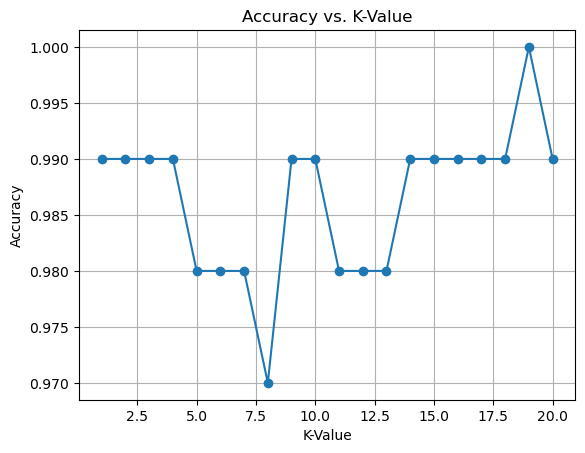

In [261]:
# WARNING!!! This takes a while to run
accuracy_list = []                                                                              # creates an empty list `accuracy_list`

i = 0                                                                                           # sets `i` equal to 0

# for every k, 99 iterations are run
for k in range(1,20):                                                                           # for k from 1 to 20
    correct_count = 0                                                                           # sets the `correct_count` equal to 0
    
    for i in range(1,100):                                                                      # for every `i` from 1 to 100
        predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)    # uses KNN algorithm to find the predicted label and list of nearest neighbors
        actual_label = testing_labels[i]                                                        # `actual_label` is the label given by the testing label
        
        if predicted_label == actual_label:                                                     # if the predicted label and the actual label are the same
            correct_count += 1                                                                  # add 1 to the correct count, else nothing gets added
    
    accuracy = correct_count / num_test_images                                                  # accuracy of each k is caclulated
    accuracy_list.append(accuracy)                                                              # accuracy is added to the `accuracy_list`

# plotting the graph
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K-Value')
plt.grid(True)
plt.show()

Looking at this elbow graph, we can see that there is 100% accuracy when the k-value is about 19.

###  <h1><center>Different Distance Metrics</center></h1>




Now, different distance equations will be implemented to see how it affects the KNN algorithm.

### Manhattan Distance

In [369]:
def KNN(training_data, training_labels, point, k):                         # define KNN as a function taking "training_data", "training_labels", (target) "point", and "k" as parameters
    
    distance = manhattanDistance(training_data, point)                     # finds the distance between each point in the training data and the target point
    distanceK = np.argsort(distance)[:k]                                   # sorts all distances in ascending order to k (the number of nearest neighbors)
    label = training_labels[distanceK]                                     # retrieves the labels of the k nearest neighbors by indexing training_labels with distanceK.
    predicted_label = st.mode(label)                                       # Finds the most frequently occuring label
    

    return predicted_label, distanceK                                      # returns the predicted label and a list of nearest neighbors

##### `testing_data` = 784 and `k` = 5

In [288]:
predicted_label, neighbors = KNN(training_data, training_labels, testing_data[784], 5)      # the function `KNN` is called with 784 points in testing_data and 5 nearest neighbors that will retun a predicted label and a list of nearest neighbors
print("Predicted Label:", predicted_label)                                                  # prints the prediceted label                                            
print("Nearest Neighbors:", neighbors)                                                      # prints the list of nearest neighbors
testing_labels[784]                                                                         # prints the actual label

Predicted Label: 7
Nearest Neighbors: [31156 35978 10640 37556 22416]


7

##### `testing_data` = 19,999 and `k` = 10

In [290]:
predicted_label, neighbors = KNN(training_data, training_labels, testing_data[19999], 10)    # the function `KNN` is called with 19999 points in testing_data and 10 nearest neighbors that will retun a predicted label and a list of nearest neighbors
print("Predicted Label:", predicted_label)                                                   # prints the prediceted label                                            
print("Nearest Neighbors:", neighbors)                                                       # prints the list of nearest neighbors
testing_labels[19999]                                                                        # prints the actual label

Predicted Label: 8
Nearest Neighbors: [24241  1013 30521 31399 20269 29965 17393  8701 20157 14611]


8

When applying the **Mannhattan Distance** metric, the algorithm seems to act just like it did with the Eucledian Distance metric. Now, we will check the accuracy. 

##### `testing_data` = 200

In [295]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,200,50):                                                                       # for `i` from 1 - 200 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

##### `testing_data` = 2000

In [298]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,2000,50):                                                                      # for `i` from 1 - 2000 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

##### `testing_data` = 10,500

In [308]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,10500,50):                                                                     # for `i` from 1 - 10,500 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 24,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 13,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

##### `testing_data` = 15,000

In [312]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics 

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], 7)         # implement KNN algorithm for training_data size 200 and 7 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 21,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Let's compare the accuracy of the KNN algorithm with Manhattan Distance to the accuracy of the KNN algorithm with Eucledian Distance. 

$$
\begin{aligned}
% First table
\begin{array}{|c|c|}
\hline
\textbf{Manhattan Distance} &  \\[-2pt]
\hline
\textbf{Dataset Size} & \textbf{Number of Errors} & \textbf{Percent Accuracy} \\
\hline
200   & 0  & 100\\
2000  & 0  & 100\\
10500 & 6  & 99.9\\
15000 & 7  & 99.9\\
\hline
\end{array}
\quad
% Second table
\begin{array}{|c|c|}
\hline
\textbf{Euclidean Distance} &  \\[-2pt]
\hline
\textbf{Dataset Size} & \textbf{Number of Errors} & \textbf{Percent Accuracy} \\
\hline
200   & 0  & 100\\
2000  & 0  & 100\\
10500 & 6  & 99.9\\
15000 & 7  & 99.9\\
\hline
\end{array}
\end{aligned}
$$



Both distance metrics have the same accuracy for each data set. They follow the same accuracy trend where as the data set increases in size, the accuracy also increases. 


##### `k` = 2

In [347]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 2                                                                                            # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 2 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 22,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 35

In [351]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 35                                                                                           # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 35 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 150

In [359]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 150                                                                                          # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 150 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[25,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

##### `k` = 500

In [360]:
from sklearn.metrics import confusion_matrix                                                     # imports the confusion_matrix function from sklearns.metrics

alabel = []                                                                                      # creates an empty list of actual labels called `alabel`
plabel = []                                                                                      # creates an empty list of predicted labels called `plabel`

i = 0                                                                                            # sets `i` equal to 0
k = 500                                                                                          # sets `k` equal to 2
    
for i in range (1,15000,50):                                                                     # for `i` from 1 - 15,000 in steps of 50
    
    predicted_label, neighbors = KNN(training_data, training_labels, testing_data[i], k)         # implement KNN algorithm for training_data size 15,000 and 500 nearest neighbors
    
    alabel.append(testing_labels[i])                                                             # append the actual testing label to the `alabel` list
    plabel.append(predicted_label)                                                               # append the predicted label to the list `plabel`

    i+=1                                                                                         # increment `i` by 1

confusion_matrix(alabel, plabel)                                                                 # create the confusion matrix

array([[25,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  4, 31,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 15,  0,  0,  0,  0,  3],
       [ 0,  2,  0,  1,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 26,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Let's compare the accuracy of the KNN algorithm with Manhattan Distance to the accuracy of the KNN algorithm with Eucledian Distance. 

$$
\begin{aligned}
% First table
\begin{array}{|c|c|}
\hline
\textbf{Manhattan Distance} &  \\[-2pt]
\hline
\textbf{k-Value} & \textbf{Number of Errors}\\
\hline
2   &  7 \\
35  &  5 \\
150 & 12 \\
500 & 22 \\
\hline
\end{array}
\quad
% Second table
\begin{array}{|c|c|}
\hline
\textbf{Euclidean Distance} &  \\[-2pt]
\hline
\textbf{k-Value} & \textbf{Number of Errors} \\
\hline
2   &  6 \\
35  &  8 \\
150 &  8 \\
500 & 16 \\
\hline
\end{array}
\end{aligned}
$$



Both distance metrics follow the same accuracy trend where as the k-value increases in size, the accuracy decreases. 


###  <h1><center>Conclusion</center></h1>

Using the `MNIST Database` to implement and test a K-Nearest Numbers Algorithm revealed many interesting things about training supervised learning method machine learning. It was very interesting to see how changing variables like testing data and the distance metrics effected the accuracy of the model.

Through the KNN algorithm, it was easy to see that increasing the size of the training set generally leads to improved accuracy. Experimenting with different values of `k`, adjusting the training set size, and trying out alternative distance metrics showed me firsthand how sensitive the algorithm is to these parameters. I didn't realize how computation heavy this type of algorithm was until analyzing the data. Looking at the data, you can see that adjusting the value of `k` highlighted a clear trade-off: a lower `k` may result in more variability in predictions, while a higher k can smooth out anomalies at the risk of oversimplifying decision boundaries. While there was supposed to be a visual aspect to show how the value of k does this, I couldn't get the code to work. Furthermore, experimenting with a different distance metric was interesting, but all of the data matched that of the KNN with Euclidean Distance. If I had more time, I'd research other distance metrics and implement them in the algorithm.

## Bibliography

https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

https://www.ibm.com/think/topics/knn

https://www.geeksforgeeks.org/k-nearest-neighbours/

https://numpy.org/doc/stable/reference/routines.html